# AI/ML for Object Detection and Classification
## Introduction to Neural Networks, CNNs, and YOLO

Welcome! In this workshop, you'll learn the fundamentals of modern AI/ML techniques used for detecting and classifying objects in images - crucial skills for robotics, autonomous systems, and computer vision applications.

### What You'll Learn:
1. **Neural Networks** - How machines learn from data
2. **Convolutional Neural Networks (CNNs)** - Specialized networks for image processing
3. **YOLO (You Only Look Once)** - Real-time object detection
4. **Practical Applications** - How these technologies power ROVs and autonomous systems


## Setup: Installing Required Libraries

In [1]:
# Install required packages
!pip install numpy matplotlib opencv-python tensorflow torch torchvision pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 32.6 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.3 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 20.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 33.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25/25 [tensorflow]5 [tensorflow]]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Set display preferences
plt.rcParams['figure.figsize'] = (12, 8)
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


---
# Part 1: Neural Networks - The Foundation

## What is a Neural Network?

A **neural network** is a computing system inspired by biological neural networks (like our brains). It learns to perform tasks by analyzing examples.

### Key Components:
- **Neurons (Nodes)**: Basic processing units that receive inputs, apply weights, and produce outputs
- **Layers**: Collections of neurons working together
  - **Input Layer**: Receives the raw data
  - **Hidden Layers**: Process and transform the data
  - **Output Layer**: Produces the final result
- **Weights**: Parameters that the network learns during training
- **Activation Functions**: Non-linear functions that help the network learn complex patterns

### How Learning Works:
1. **Forward Pass**: Input data flows through the network
2. **Calculate Error**: Compare output to expected result
3. **Backward Pass (Backpropagation)**: Adjust weights to reduce error
4. **Repeat**: Do this thousands of times with different examples

Let's build a simple neural network from scratch!

## 1.1 Building a Simple Neuron

A single neuron performs: **output = activation(weighted_sum + bias)**

In [3]:
def sigmoid(x):
    """Sigmoid activation function: squashes values between 0 and 1"""
    return 1 / (1 + np.exp(-x))

def relu(x):
    """ReLU activation function: max(0, x)"""
    return np.maximum(0, x)

class SimpleNeuron:
    """A single artificial neuron."""
    
    def __init__(self, num_inputs):
        # Initialize random weights and bias
        self.weights = np.random.randn(num_inputs) * 0.1
        self.bias = 0.0
    
    def forward(self, inputs):
        """Compute neuron output."""
        # Weighted sum
        z = np.dot(inputs, self.weights) + self.bias
        # Apply activation
        output = sigmoid(z)
        return output

# Test our neuron
neuron = SimpleNeuron(num_inputs=3)
test_input = np.array([1.0, 2.0, 3.0])
output = neuron.forward(test_input)

print(f"Input: {test_input}")
print(f"Weights: {neuron.weights}")
print(f"Bias: {neuron.bias}")
print(f"Output: {output:.4f}")

Input: [1. 2. 3.]
Weights: [ 0.04967142 -0.01382643  0.06476885]
Bias: 0.0
Output: 0.5539


## 1.2 Visualizing Activation Functions

Activation functions introduce non-linearity, allowing networks to learn complex patterns.

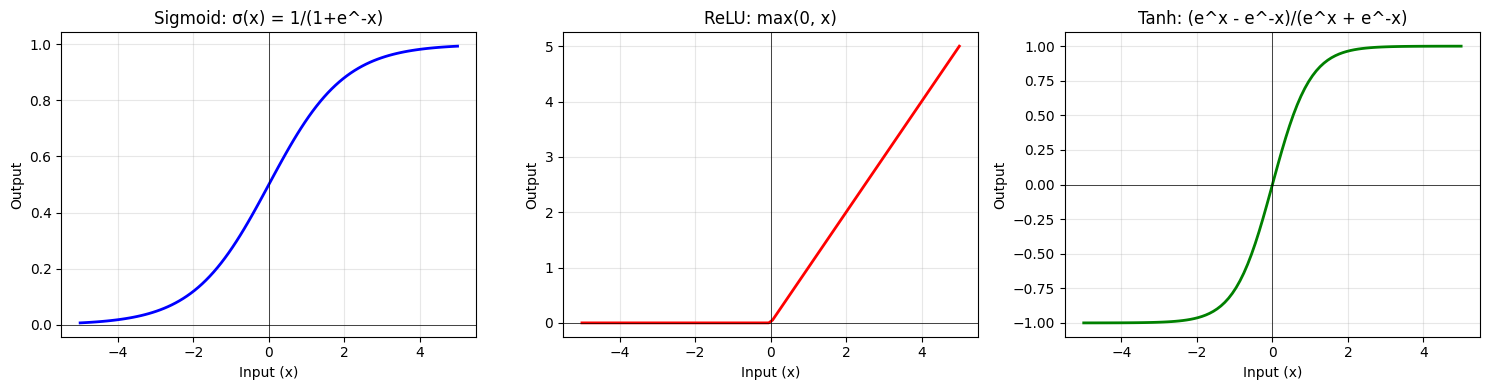

.  Key Differences:
   Sigmoid: Outputs between 0 and 1 (good for probabilities)
   ReLU: Outputs 0 for negative, x for positive (fast, popular)
   Tanh: Outputs between -1 and 1 (centered around 0)


In [21]:
# Generate input range
x = np.linspace(-5, 5, 100)

# Calculate different activation functions
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = np.tanh(x)

# Plot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, 'b-', linewidth=2)
plt.title('Sigmoid: σ(x) = 1/(1+e^-x)', fontsize=12)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.subplot(1, 3, 2)
plt.plot(x, y_relu, 'r-', linewidth=2)
plt.title('ReLU: max(0, x)', fontsize=12)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, 'g-', linewidth=2)
plt.title('Tanh: (e^x - e^-x)/(e^x + e^-x)', fontsize=12)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print(".  Key Differences:")
print("   Sigmoid: Outputs between 0 and 1 (good for probabilities)")
print("   ReLU: Outputs 0 for negative, x for positive (fast, popular)")
print("   Tanh: Outputs between -1 and 1 (centered around 0)")

## 1.3 A Simple Neural Network for Classification

Let's build a 2-layer network to classify data points!

In [ ]:
class SimpleNeuralNetwork:
    """A basic 2-layer neural network."""
    
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros(output_size)
    
    def forward(self, X):
        """Forward pass through the network."""
        # Layer 1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)  # Hidden layer activation
        
        # Layer 2
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer activation
        
        return self.a2
    
    def predict(self, X):
        """Make predictions (0 or 1)."""
        output = self.forward(X)
        return (output > 0.5).astype(int)

# Create sample data: XOR problem
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])  # XOR outputs

# Create network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Test before training
print("Before Training:")
predictions = nn.predict(X)
for i in range(len(X)):
    print(f"  Input: {X[i]} → Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

print("\n The network makes random predictions initially!")
print("   (Training would adjust weights to learn the XOR pattern)")

Before Training:
  Input: [0 0] → Predicted: 0, Actual: 0
  Input: [0 1] → Predicted: 0, Actual: 1
  Input: [1 0] → Predicted: 1, Actual: 1
  Input: [1 1] → Predicted: 0, Actual: 0

 The network makes random predictions initially!
   (Training would adjust weights to learn the XOR pattern)


### Exercise 1: Experiment with Network Architecture

Try changing the `hidden_size` parameter above. What happens with:
- `hidden_size=2` (very small)
- `hidden_size=10` (larger)
- `hidden_size=100` (very large)

**Think about:** How does network size affect its capacity to learn?

---
# Part 2: Convolutional Neural Networks (CNNs)

## Why CNNs for Images?

Regular neural networks struggle with images because:
- **Too many parameters**: A 200×200 RGB image has 120,000 inputs!
- **Lost spatial information**: Flattening an image loses the relationships between nearby pixels
- **Not translation invariant**: The network treats the same object differently if it's in different positions

**CNNs solve this** by:
1. Using **convolutional layers** that detect features (edges, shapes, textures)
2. Using **pooling layers** to reduce dimensions while keeping important information
3. Sharing weights across the image (same filter detects the same feature anywhere)

### CNN Architecture:
```
Input Image → [Conv → ReLU → Pool] → [Conv → ReLU → Pool] → Flatten → Dense → Output
```

## 2.1 Understanding Convolution

A **convolution** slides a small filter (kernel) over an image, computing dot products to create a feature map.

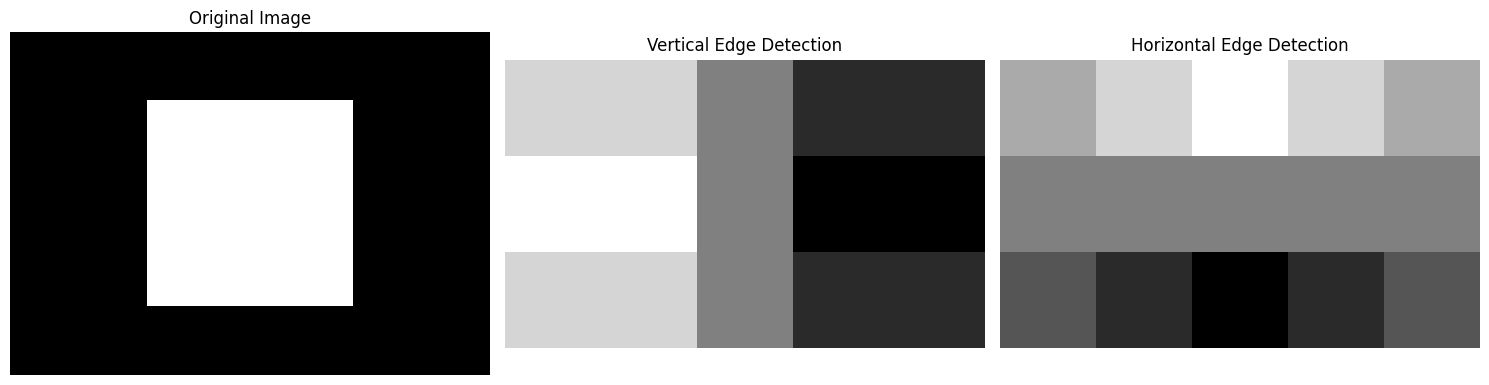

 Notice how different kernels detect different features!


In [25]:
def apply_convolution(image, kernel):
    """Apply a convolution operation manually."""
    img_height, img_width = image.shape
    kernel_size = kernel.shape[0]
    
    # Output size
    out_height = img_height - kernel_size + 1
    out_width = img_width - kernel_size + 1
    output = np.zeros((out_height, out_width))
    
    # Slide kernel over image
    for i in range(out_height):
        for j in range(out_width):
            # Extract region
            region = image[i:i+kernel_size, j:j+kernel_size]
            # Compute dot product
            output[i, j] = np.sum(region * kernel)
    
    return output

# Create a simple test image
test_img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Define different kernels
vertical_edge_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

horizontal_edge_kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

# Apply convolutions
vertical_edges = apply_convolution(test_img, vertical_edge_kernel)
horizontal_edges = apply_convolution(test_img, horizontal_edge_kernel)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(test_img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(vertical_edges, cmap='gray')
axes[1].set_title('Vertical Edge Detection')
axes[1].axis('off')

axes[2].imshow(horizontal_edges, cmap='gray')
axes[2].set_title('Horizontal Edge Detection')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(" Notice how different kernels detect different features!")

## 2.2 Pooling - Reducing Dimensions

**Pooling** reduces the spatial size of feature maps, making the network:
- More computationally efficient
- More robust to small translations
- Less prone to overfitting

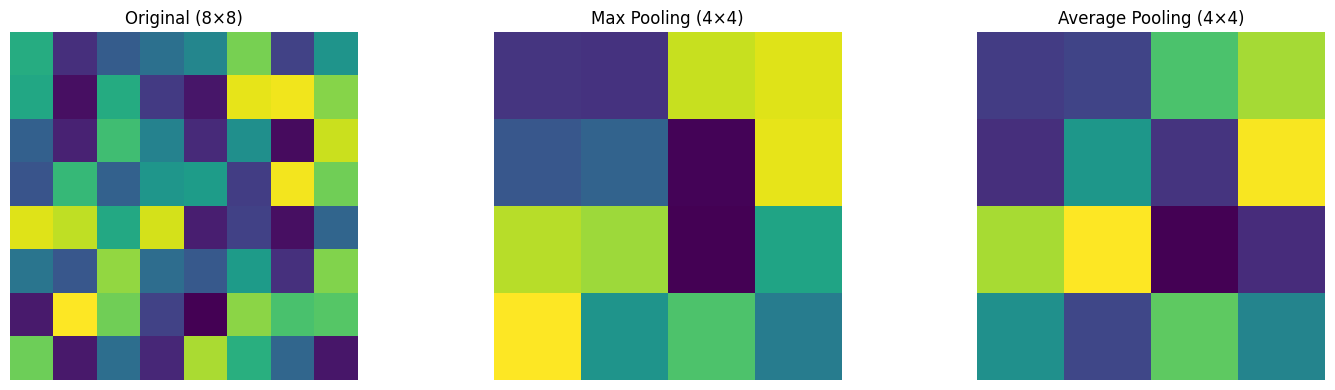

Size reduction: (8, 8) → (4, 4)
Parameters reduced by: 75%


In [7]:
def max_pooling(image, pool_size=2):
    """Apply max pooling to reduce image size."""
    h, w = image.shape
    out_h, out_w = h // pool_size, w // pool_size
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            # Extract pool region
            region = image[
                i*pool_size:(i+1)*pool_size,
                j*pool_size:(j+1)*pool_size
            ]
            # Take maximum value
            output[i, j] = np.max(region)
    
    return output

def average_pooling(image, pool_size=2):
    """Apply average pooling."""
    h, w = image.shape
    out_h, out_w = h // pool_size, w // pool_size
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            region = image[
                i*pool_size:(i+1)*pool_size,
                j*pool_size:(j+1)*pool_size
            ]
            output[i, j] = np.mean(region)
    
    return output

# Create a larger test image
large_img = np.random.rand(8, 8)

# Apply different pooling strategies
max_pooled = max_pooling(large_img, pool_size=2)
avg_pooled = average_pooling(large_img, pool_size=2)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(large_img, cmap='viridis')
axes[0].set_title(f'Original ({large_img.shape[0]}×{large_img.shape[1]})')
axes[0].axis('off')

axes[1].imshow(max_pooled, cmap='viridis')
axes[1].set_title(f'Max Pooling ({max_pooled.shape[0]}×{max_pooled.shape[1]})')
axes[1].axis('off')

axes[2].imshow(avg_pooled, cmap='viridis')
axes[2].set_title(f'Average Pooling ({avg_pooled.shape[0]}×{avg_pooled.shape[1]})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Size reduction: {large_img.shape} → {max_pooled.shape}")
print(f"Parameters reduced by: {(1 - max_pooled.size/large_img.size)*100:.0f}%")

## 2.3 Building a Simple CNN with PyTorch

Now let's build a real CNN using PyTorch - a popular deep learning framework!

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    """A simple CNN for image classification."""
    
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, num_classes)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        # Conv block 1: Conv → ReLU → Pool
        x = self.pool(F.relu(self.conv1(x)))  # 32×32 → 16×16
        
        # Conv block 2
        x = self.pool(F.relu(self.conv2(x)))  # 16×16 → 8×8
        
        # Conv block 3
        x = self.pool(F.relu(self.conv3(x)))  # 8×8 → 4×4
        
        # Flatten
        x = x.view(-1, 64 * 4 * 4)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Create the model
model = SimpleCNN(num_classes=10)

# Print model architecture
print("CNN Architecture:")
print("=" * 60)
print(model)
print("=" * 60)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Test with a random image
test_input = torch.randn(1, 3, 32, 32)  # Batch=1, Channels=3, Height=32, Width=32
output = model(test_input)
print(f"\nInput shape: {test_input.shape}")
print(f"Output shape: {output.shape}")
print(f"Output (class scores): {output.detach().numpy()}")

CNN Architecture:
SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Total parameters: 156,074
Trainable parameters: 156,074

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 10])
Output (class scores): [[ 0.07642223 -0.02110124 -0.00040331  0.07707755  0.03269754  0.07333475
   0.07160392  0.04367549  0.02491185  0.09197883]]


### Understanding the Architecture

Our CNN processes a 32×32 RGB image:

1. **Input**: 32×32×3 (width × height × RGB channels)
2. **Conv1 + Pool**: → 16×16×16 (16 feature maps)
3. **Conv2 + Pool**: → 8×8×32 (32 feature maps)
4. **Conv3 + Pool**: → 4×4×64 (64 feature maps)
5. **Flatten**: → 1024 values
6. **FC1**: → 128 values
7. **FC2**: → 10 class scores

The network learns:
- **Early layers**: Simple features (edges, colors)
- **Middle layers**: Shapes and textures
- **Deep layers**: Complex patterns and objects

### Exercise 2: Design Your Own CNN

Try modifying the CNN architecture:
- Add more convolutional layers
- Change the number of filters
- Experiment with different kernel sizes

How do these changes affect the number of parameters?

In [ ]:
# TODO: Create your own CNN architecture here
# Experiment with different configurations!

class YourCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(YourCNN, self).__init__()
        # Your architecture here
        pass
    
    def forward(self, x):
        # Your forward pass here
        pass

# Uncomment to test:
# your_model = YourCNN()
# print(your_model)

---
# Part 3: YOLO - Real-Time Object Detection

## What is YOLO?

**YOLO (You Only Look Once)** is a popular object detection algorithm that:
- Detects multiple objects in a single pass
- Predicts bounding boxes AND class probabilities simultaneously

### Traditional Object Detection vs. YOLO

**Traditional Methods (R-CNN family):**
1. Generate region proposals (~2000 regions)
2. Run CNN on each region separately
3. Classify each region
4. Slow!

**YOLO:**
1. Divide image into a grid (e.g., 13×13)
2. Each grid cell predicts bounding boxes and classes
3. Single neural network processes entire image at once
4. Fast! (30-60+ FPS)

### How YOLO Works:

For each grid cell, YOLO predicts:
- **Bounding boxes**: (x, y, width, height)
- **Confidence score**: How confident the box contains an object
- **Class probabilities**: What type of object it is

**Output**: Grid × Grid × (Boxes × (5 + Classes))
- 5 = x, y, w, h, confidence
- Classes = number of object categories

## 3.1 YOLO Concepts - Grid and Bounding Boxes

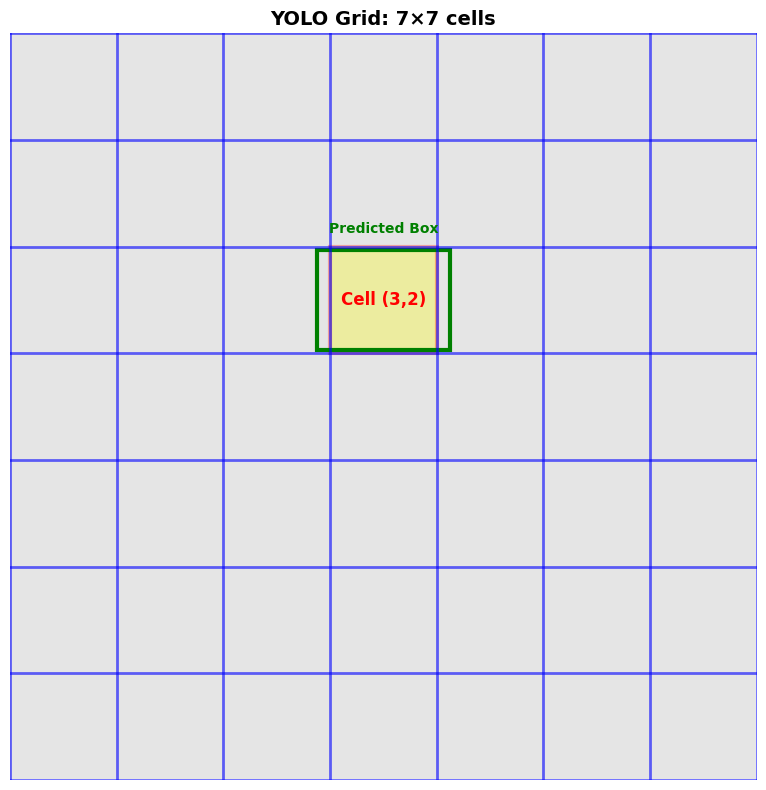

 YOLO divides the image into a 7×7 grid
   Total grid cells: 49
   Each cell predicts bounding boxes for objects whose center falls in that cell


In [27]:
def visualize_yolo_grid(image_size=448, grid_size=7):
    """Visualize how YOLO divides an image into a grid."""
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # Create image
    img = np.ones((image_size, image_size, 3)) * 0.9
    ax.imshow(img)
    
    # Draw grid
    cell_size = image_size // grid_size
    for i in range(grid_size + 1):
        pos = i * cell_size
        ax.axhline(y=pos, color='blue', linewidth=2, alpha=0.6)
        ax.axvline(x=pos, color='blue', linewidth=2, alpha=0.6)
    
    # Simulate a bounding box prediction
    # Let's say cell (3, 2) detects an object
    cell_x, cell_y = 3, 2
    
    # Highlight the responsible cell
    rect = plt.Rectangle(
        (cell_x * cell_size, cell_y * cell_size),
        cell_size, cell_size,
        linewidth=3, edgecolor='red', facecolor='yellow', alpha=0.3
    )
    ax.add_patch(rect)
    
    # Draw a predicted bounding box
    bbox_x = cell_x * cell_size + cell_size // 2 - 40
    bbox_y = cell_y * cell_size + cell_size // 2 - 30
    bbox_w = 80
    bbox_h = 60
    
    bbox = plt.Rectangle(
        (bbox_x, bbox_y), bbox_w, bbox_h,
        linewidth=3, edgecolor='green', facecolor='none'
    )
    ax.add_patch(bbox)
    
    # Add labels
    ax.text(bbox_x + bbox_w/2, bbox_y - 10, 'Predicted Box',
            color='green', fontsize=10, ha='center', weight='bold')
    ax.text(cell_x * cell_size + cell_size/2, cell_y * cell_size + cell_size/2,
            f'Cell ({cell_x},{cell_y})',
            color='red', fontsize=12, ha='center', va='center', weight='bold')
    
    ax.set_xlim(0, image_size)
    ax.set_ylim(image_size, 0)
    ax.set_title(f'YOLO Grid: {grid_size}×{grid_size} cells', fontsize=14, weight='bold')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f" YOLO divides the image into a {grid_size}×{grid_size} grid")
    print(f"   Total grid cells: {grid_size * grid_size}")
    print(f"   Each cell predicts bounding boxes for objects whose center falls in that cell")

visualize_yolo_grid()

## 3.2 Understanding YOLO Output

Let's simulate what YOLO outputs for a single grid cell.

In [28]:
def simulate_yolo_prediction(grid_size=7, num_boxes=2, num_classes=20):
    """
    Simulate YOLO prediction output.
    
    For each grid cell, YOLO predicts:
    - B bounding boxes, each with (x, y, w, h, confidence)
    - Class probabilities for C classes
    """
    
    # Output shape: (grid_size, grid_size, num_boxes * 5 + num_classes)
    output_depth = num_boxes * 5 + num_classes
    
    print("YOLO Output Structure")
    print("=" * 60)
    print(f"Grid size: {grid_size}×{grid_size}")
    print(f"Bounding boxes per cell: {num_boxes}")
    print(f"Number of classes: {num_classes}")
    print(f"\nOutput tensor shape: ({grid_size}, {grid_size}, {output_depth})")
    print(f"\nFor each grid cell:")
    print(f"  - First {num_boxes * 5} values: Bounding box predictions")
    
    for i in range(num_boxes):
        start = i * 5
        print(f"    • Box {i+1}: [x, y, w, h, confidence] at indices {start}-{start+4}")
    
    print(f"  - Last {num_classes} values: Class probabilities")
    print(f"\nTotal predictions per image: {grid_size * grid_size * num_boxes} bounding boxes")
    
    # Simulate a single cell's prediction
    print("\n" + "=" * 60)
    print("Example: Single Grid Cell Output")
    print("=" * 60)
    
    # Random predictions for one cell
    cell_output = np.random.rand(output_depth)
    
    # Parse bounding boxes
    for i in range(num_boxes):
        start = i * 5
        x, y, w, h, conf = cell_output[start:start+5]
        print(f"\nBounding Box {i+1}:")
        print(f"  Position: ({x:.3f}, {y:.3f})")
        print(f"  Size: {w:.3f} × {h:.3f}")
        print(f"  Confidence: {conf:.3f} ({conf*100:.1f}%)")
    
    # Parse class probabilities
    class_probs = cell_output[num_boxes * 5:]
    top_class_idx = np.argmax(class_probs)
    top_class_prob = class_probs[top_class_idx]
    
    print(f"\nClass Predictions:")
    print(f"  Top predicted class: Class #{top_class_idx}")
    print(f"  Probability: {top_class_prob:.3f} ({top_class_prob*100:.1f}%)")

simulate_yolo_prediction()

YOLO Output Structure
Grid size: 7×7
Bounding boxes per cell: 2
Number of classes: 20

Output tensor shape: (7, 7, 30)

For each grid cell:
  - First 10 values: Bounding box predictions
    • Box 1: [x, y, w, h, confidence] at indices 0-4
    • Box 2: [x, y, w, h, confidence] at indices 5-9
  - Last 20 values: Class probabilities

Total predictions per image: 98 bounding boxes

Example: Single Grid Cell Output

Bounding Box 1:
  Position: (0.592, 0.046)
  Size: 0.608 × 0.171
  Confidence: 0.065 (6.5%)

Bounding Box 2:
  Position: (0.949, 0.966)
  Size: 0.808 × 0.305
  Confidence: 0.098 (9.8%)

Class Predictions:
  Top predicted class: Class #12
  Probability: 0.970 (97.0%)


## 3.3 Using Pre-trained YOLO (YOLOv5)

Let's use a real YOLO model to detect objects! We'll use YOLOv5 from Ultralytics.

In [11]:
# Install YOLOv5
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.7/805.7 kB 22.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 21.4 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 19.1 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [ultralytics] [ultralytics]me-32]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
from ultralytics import YOLO
from PIL import Image

# Load pre-trained YOLOv5 model
print("Loading YOLOv5 model...")
model = YOLO('yolov8n.pt')  # nano model (smallest, fastest)

print("✓ Model loaded!")
print(f"\nModel can detect {len(model.names)} different classes:")
print(list(model.names.values())[:10], "...and more")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/maxbyng-maddick/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading YOLOv5 model...
WARNING ⚠️ Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8n.pt... <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1032)>


###                                                                        5.5%

✓ Model loaded!

Model can detect 80 different classes:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light'] ...and more


######################################################################## 100.0%



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /Users/maxbyng-maddick/Documents/Hydrobotics/Workshops/workshops/2026/Febuary BCSS Workshop/Tracks/AI/ML/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 103.6ms
Speed: 22.9ms preprocess, 103.6ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 480)
Found 6 objects

Detected objects:
----------------------------------------
bus: 0.87
person: 0.87
person: 0.85
person: 0.83
person: 0.26
stop sign: 0.26


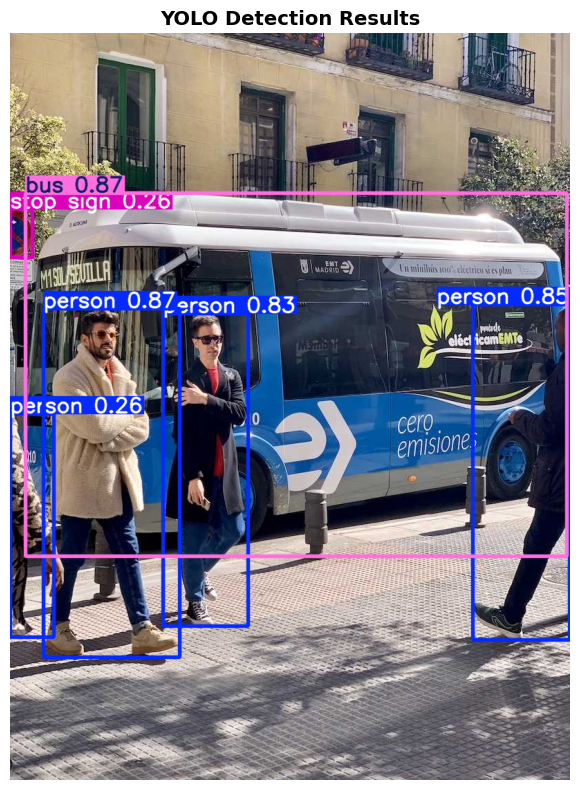

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Detect objects from URL
results = model('https://ultralytics.com/images/bus.jpg')

print(f"Found {len(results[0].boxes)} objects\n")

# Get and print detections
print("Detected objects:")
print("-" * 40)
for box in results[0].boxes:
    class_id = int(box.cls[0])
    confidence = float(box.conf[0])
    class_name = model.names[class_id]
    print(f'{class_name}: {confidence:.2f}')

# Get the plotted image as numpy array
result_img = results[0].plot()  # Returns image with bounding boxes drawn

# Convert from BGR to RGB for matplotlib
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Display in notebook
plt.figure(figsize=(12, 8))
plt.imshow(result_img_rgb)
plt.axis('off')
plt.title('YOLO Detection Results', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Exercise 3: Test YOLO on Your Own Images

Try running YOLO on different images and observe:
- How accurate are the detections?
- How fast is it?
- What happens with multiple objects?
- What happens with overlapping objects?

In [ ]:
# TODO: Test YOLO on your own image
# Replace with your image path or URL

# image_path = "your_image.jpg"
# results = model(image_path)
# results[0].show()

---
# Part 4: Applications in ROV Systems

## How These Technologies Power Underwater Robotics

### 1. **Obstacle Detection and Avoidance**
- **CNNs** identify obstacles in murky water
- **YOLO** provides real-time detection for navigation
- Helps ROVs avoid rocks, marine life, and equipment

### 2. **Marine Life Classification**
- Identify species for research and conservation
- Track endangered species populations
- Monitor coral reef health

### 3. **Infrastructure Inspection**
- Detect cracks and damage in underwater structures
- Identify corrosion on pipes
- Monitor dam and bridge foundations

### 4. **Object Retrieval**
- Locate specific objects on the seafloor
- Guide robotic arms for manipulation
- Search and rescue operations

### 5. **Autonomous Navigation**
- Real-time path planning
- Object tracking and following
- Mapping and 3D reconstruction

## 4.1 Challenges in Underwater Computer Vision

Underwater environments present unique challenges:

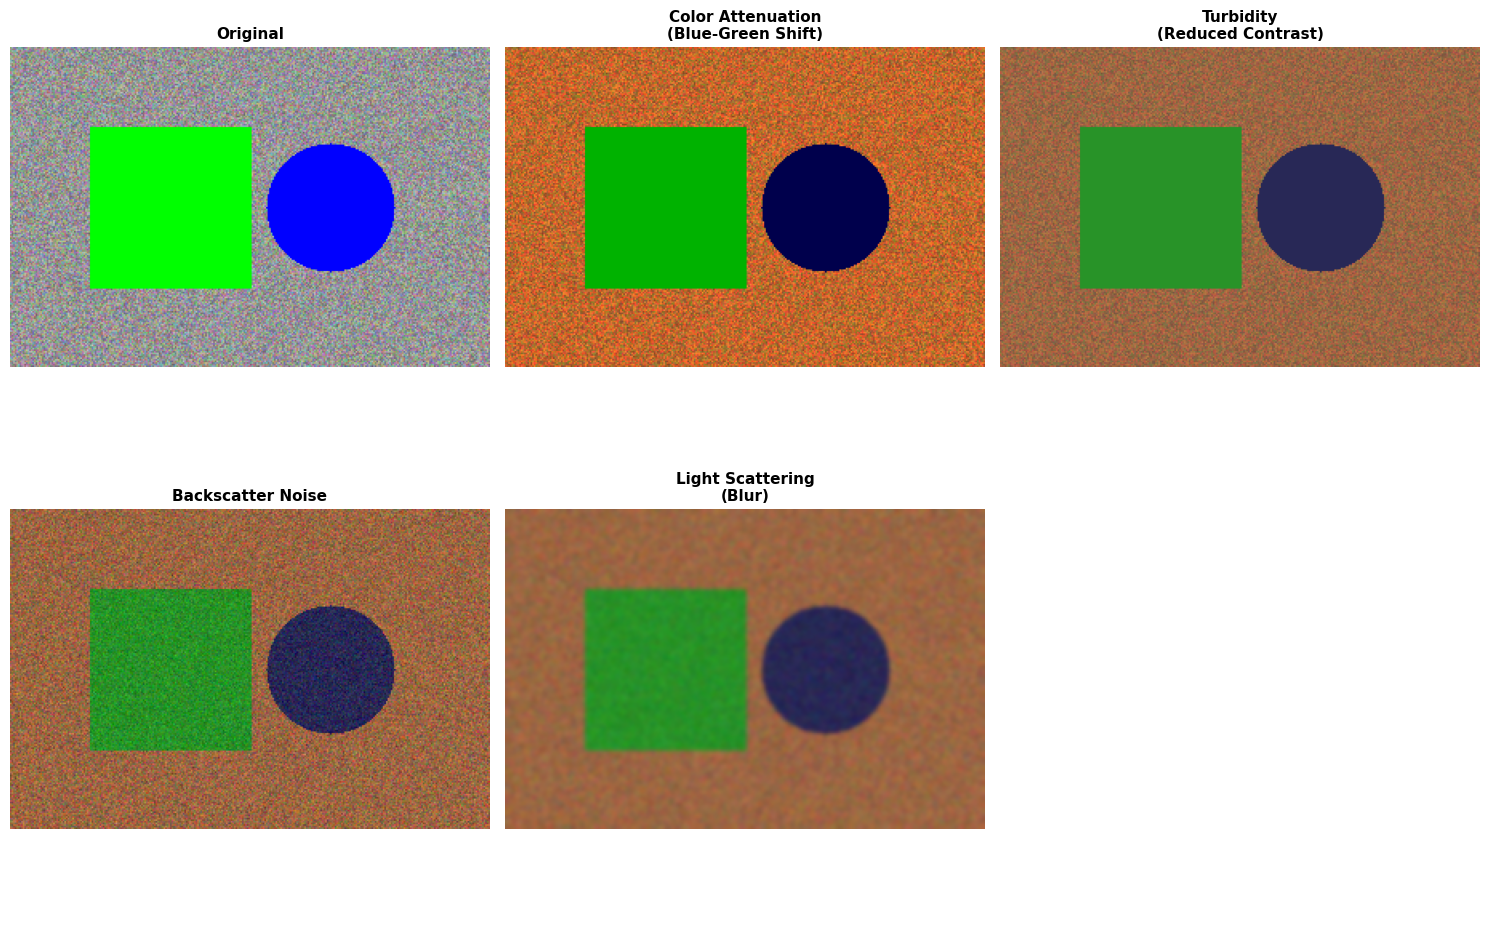

 Underwater Imaging Challenges:
   1. Color Attenuation: Red light absorbed first, blue penetrates deepest
   2. Turbidity: Suspended particles reduce visibility
   3. Backscatter: Light reflects off particles creating noise
   4. Light Scattering: Objects appear blurred

 Solution: Neural networks can be trained on degraded images
   to become robust to these conditions!


In [19]:
def simulate_underwater_conditions(image):
    """Simulate challenging underwater imaging conditions."""
    
    # Original image
    original = image.copy()
    
    # 1. Color attenuation (blue-green shift)
    color_shift = image.copy()
    color_shift[:, :, 0] = color_shift[:, :, 0] * 0.3  # Reduce red
    color_shift[:, :, 1] = color_shift[:, :, 1] * 0.7  # Reduce green slightly
    color_shift[:, :, 2] = np.clip(color_shift[:, :, 2] * 1.3, 0, 255)  # Increase blue
    
    # 2. Turbidity (reduced visibility)
    turbidity = cv2.addWeighted(color_shift, 0.6, 
                                np.ones_like(color_shift) * 100, 0.4, 0)
    
    # 3. Noise (particle backscatter)
    noise = np.random.normal(0, 15, turbidity.shape)
    noisy = np.clip(turbidity + noise, 0, 255).astype(np.uint8)
    
    # 4. Blur (light scattering)
    blurred = cv2.GaussianBlur(noisy, (7, 7), 0)
    
    return original, color_shift, turbidity, noisy, blurred

# Create or load a test image
test_img = np.random.randint(100, 200, (200, 300, 3), dtype=np.uint8)
# Add some features
cv2.rectangle(test_img, (50, 50), (150, 150), (0, 255, 0), -1)
cv2.circle(test_img, (200, 100), 40, (255, 0, 0), -1)

# Simulate conditions
orig, color, turb, noise_img, blur = simulate_underwater_conditions(test_img)

# Display
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

images = [orig, color, turb, noise_img, blur]
titles = ['Original', 'Color Attenuation\n(Blue-Green Shift)', 
          'Turbidity\n(Reduced Contrast)', 'Backscatter Noise',
          'Light Scattering\n(Blur)']

for i, (img, title) in enumerate(zip(images, titles)):
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(title, fontsize=11, weight='bold')
    axes[i].axis('off')

axes[5].axis('off')
plt.tight_layout()
plt.show()

print(" Underwater Imaging Challenges:")
print("   1. Color Attenuation: Red light absorbed first, blue penetrates deepest")
print("   2. Turbidity: Suspended particles reduce visibility")
print("   3. Backscatter: Light reflects off particles creating noise")
print("   4. Light Scattering: Objects appear blurred")
print("\n Solution: Neural networks can be trained on degraded images")
print("   to become robust to these conditions!")

---
# Summary

Congratulations! You've learned the fundamentals of AI/ML for object detection:


## Next Steps

1. **Experiment**: Try YOLO on different images and videos
2. **Build**: Create your own CNN architecture for a specific task
3. **Learn More**: Explore advanced topics:
   - Transfer learning
   - Data augmentation
   - Model optimization for embedded systems
   - Custom object detection for specific domains

4. **Apply**: Think about how you could use these techniques in your own projects!

---

## Resources

- [Deep Learning Book](http://www.deeplearningbook.org/) - Comprehensive theory
- [Stanford CS231n](http://cs231n.stanford.edu/) - CNN course with lectures
- [YOLO Official](https://github.com/ultralytics/ultralytics) - Latest YOLO implementations
- [PyTorch Tutorials](https://pytorch.org/tutorials/) - Hands-on deep learning
- [Papers With Code](https://paperswithcode.com/) - Latest research and implementations